<h4>Question 1aii Develop Model</h4>

In [76]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("Q1ai-CleanData.csv")
df.head()

CAR_BRAND  CAR_LENGTH  CAR_WIDTH  CAR_HEIGHT  CAR_DOOR_NUM CAR_BODY_STYLE  \
0       ISUZU     4335.78    1569.72     1358.90             4          SEDAN   
1      TOYOTA     4224.02    1635.76     1341.12             4      HATCHBACK   
2       HONDA     4455.16    1656.08     1374.14             4          SEDAN   
3       HONDA     4455.16    1587.50     1374.14             4          SEDAN   
4  VOLKSWAGEN     4361.18    1663.70     1414.78             4          SEDAN   

  CAR_DRIVE_WHEELS CAR_ENGINE_LOC  CAR_ENGINE_SIZE  CAR_ENGINE_BORE  ...  \
0              RWD          FRONT              122              3.3  ...   
1              FWD          FRONT              109              3.2  ...   
2              FWD          FRONT              121              3.2  ...   
3              FWD          FRONT              121              3.2  ...   
4              FWD          FRONT              108              3.0  ...   

   CAR_ENGINE_POWER  CAR_WHEEL_BASE  CAR_CURB_WEIGHT  CAR_PEAK_RPM  \
0              81.0         2395.22             1060        4900.0   
1              73.0         2430.78              963        4900.0   
2             104.0         2451.10             1118        5900.0   
3              89.0         2451.10             1076        5900.0   
4              71.0         2471.42             1052        4600.0   

   CAR_SALE_PRICE  CAR_CITY_KPL  CAR_HIGHWAY_KPL  CAR_FUEL_TYPE  \
0         8345.55         10.32            12.47            GAS   
1        10280.34         12.04            14.62            GAS   
2        15922.35         10.32            12.04            GAS   
3        12662.85         11.61            14.19            GAS   
4        11678.85         15.91            18.06         DIESEL   

  CAR_FUEL_SYSTEM CAR_COMPRESSION_RATIO  
0            2BBL                     9  
1            2BBL                     9  
2            MPFI                     9  
3            1BBL                     9  
4             IDI                    23  

[5 rows x 21 columns]

In [78]:
X = df.drop(['CAR_SALE_PRICE'],axis=1)  #independent columns
y = df.CAR_SALE_PRICE    #target column


In [79]:
# create label encoder object
le = LabelEncoder()

<h4>Encode the categorical variable</h4>

In [80]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical=[]
for column in df:
    if is_string_dtype(df[column]):
        categorical.append(column)
        
def transform(data, var):
    data[var]= le.fit_transform(data[var])

for i in categorical:
    transform(df, i)

In [81]:
df.head()

CAR_BRAND  CAR_LENGTH  CAR_WIDTH  CAR_HEIGHT  CAR_DOOR_NUM  CAR_BODY_STYLE  \
0          5     4335.78    1569.72     1358.90             4               3   
1         17     4224.02    1635.76     1341.12             4               2   
2          4     4455.16    1656.08     1374.14             4               3   
3          4     4455.16    1587.50     1374.14             4               3   
4         18     4361.18    1663.70     1414.78             4               3   

   CAR_DRIVE_WHEELS  CAR_ENGINE_LOC  CAR_ENGINE_SIZE  CAR_ENGINE_BORE  ...  \
0                 2               0              122              3.3  ...   
1                 1               0              109              3.2  ...   
2                 1               0              121              3.2  ...   
3                 1               0              121              3.2  ...   
4                 1               0              108              3.0  ...   

   CAR_ENGINE_POWER  CAR_WHEEL_BASE  CAR_CURB_WEIGHT  CAR_PEAK_RPM  \
0              81.0         2395.22             1060        4900.0   
1              73.0         2430.78              963        4900.0   
2             104.0         2451.10             1118        5900.0   
3              89.0         2451.10             1076        5900.0   
4              71.0         2471.42             1052        4600.0   

   CAR_SALE_PRICE  CAR_CITY_KPL  CAR_HIGHWAY_KPL  CAR_FUEL_TYPE  \
0         8345.55         10.32            12.47              1   
1        10280.34         12.04            14.62              1   
2        15922.35         10.32            12.04              1   
3        12662.85         11.61            14.19              1   
4        11678.85         15.91            18.06              0   

   CAR_FUEL_SYSTEM  CAR_COMPRESSION_RATIO  
0                1                      9  
1                1                      9  
2                5                      9  
3                0                      9  
4                3                     23  

[5 rows x 21 columns]

<h4>1) Train model with full feature</h4>

Linear Regression was selected to train the model as the target variable is numerical data type.

In [89]:
#split the data into 70% of training data and 30% of test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
model = LinearRegression()  
model.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [91]:
y_pred = model.predict(X_test)
y_pred

array([ 8212.43311574,  9163.29262523,  9447.87321049, ...,
       10805.5370946 , 23981.74823612, 51015.17287406])

In [92]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is",score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.8944643312960664
mean_sqrd_error is 9994065.046099452
root_mean_squared error of is 3161.3391222865434


<h4>The model above trained with all the features. The accuracy score is 89.45%. So, we will train the model with the selected features according to the feature importance now. Before that, lets calculate the feature importance score and find out the most significant features first.</h4>

In [88]:
correlation = df.corr()
abs(correlation["CAR_SALE_PRICE"]).sort_values()

CAR_DOOR_NUM             0.056819
CAR_BODY_STYLE           0.067859
CAR_COMPRESSION_RATIO    0.082446
CAR_PEAK_RPM             0.100687
CAR_ENGINE_STROKE        0.102924
CAR_FUEL_TYPE            0.111973
CAR_BRAND                0.132594
CAR_HEIGHT               0.139025
CAR_ENGINE_LOC           0.331928
CAR_FUEL_SYSTEM          0.521322
CAR_ENGINE_BORE          0.541360
CAR_DRIVE_WHEELS         0.590148
CAR_WHEEL_BASE           0.598337
CAR_CITY_KPL             0.686752
CAR_LENGTH               0.688106
CAR_HIGHWAY_KPL          0.701967
CAR_WIDTH                0.757267
CAR_ENGINE_POWER         0.810942
CAR_CURB_WEIGHT          0.833007
CAR_ENGINE_SIZE          0.872485
CAR_SALE_PRICE           1.000000
Name: CAR_SALE_PRICE, dtype: float64

<h4>According to the correlation, we know that CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_ENGINE_POWER, CAR_WIDTH, and CAR_HIGHWAY_KPL are five most correlated features to CAR_SALE_PRICE</h4>

<h3>Next, let's perform the feature selection to select the significant features in this dataset. There are three types of feature selection such as filter method, wrapper method and embedded method.</h3>

<h3>Feature selection helps to reduce overfitting problem, improves accuracy, and reduce training times.</h3>

<h3>We have performed the filter method above which is correlation matrix</h3>

<h4>Feature Selection Using XGBRegressor</h4>

In [82]:
X = df.drop(['CAR_SALE_PRICE'],axis=1)  #independent columns
y = df.CAR_SALE_PRICE    #target column

                       Importance
CAR_ENGINE_SIZE          0.814519
CAR_CURB_WEIGHT          0.045728
CAR_WIDTH                0.024120
CAR_WHEEL_BASE           0.021224
CAR_ENGINE_BORE          0.020028
CAR_ENGINE_POWER         0.017002
CAR_PEAK_RPM             0.011647
CAR_DRIVE_WHEELS         0.010224
CAR_HIGHWAY_KPL          0.007975
CAR_ENGINE_STROKE        0.006667
CAR_BRAND                0.005387
CAR_CITY_KPL             0.004416
CAR_LENGTH               0.003266
CAR_HEIGHT               0.003104
CAR_COMPRESSION_RATIO    0.002357
CAR_BODY_STYLE           0.001279
CAR_DOOR_NUM             0.000948
CAR_FUEL_SYSTEM          0.000100
CAR_FUEL_TYPE            0.000008
CAR_ENGINE_LOC           0.000000


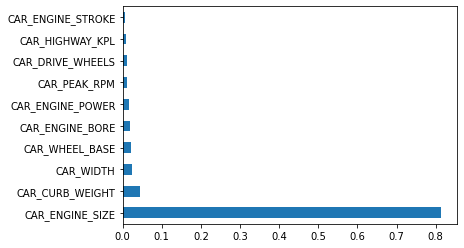

In [83]:
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns) #construct a new DataFrame with feature importance
imp = imp.sort_values(['Importance'], ascending = False)
print(imp)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh') #return the first n rows ordered by columns in descending order.
plt.show()


<h3>According to the correlation, we know that CAR_ENGINE_SIZE, CAR_CURB_WEIGHT are two most correlated features to CAR_SALE_PRICE</h3>

<h3>According to the XBGRegressor, it shows that CAR_ENGINE_SIZE, CAR_CURB_WEIGHT are the most two significant features in this dataset.</h3> 

<h4>2) Train the model with the selected features.</h4>

In [95]:
X1 = df[['CAR_ENGINE_SIZE','CAR_CURB_WEIGHT']] 
y1 = df["CAR_SALE_PRICE"]  

In [99]:
#split the data into 70% of training data and 30% of test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

model1 = LinearRegression()  
model1.fit(X1_train, y1_train) #training the algorithm

y1_pred = model1.predict(X1_test)
y1_pred

# predicting the accuracy score
score1=r2_score(y1_test,y1_pred)
print("r2 score is",score1)
print("mean_sqrd_error is",mean_squared_error(y1_test,y1_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y1_test,y1_pred)))


r2 score is 0.7928445249596989
mean_sqrd_error is 19617303.965888772
root_mean_squared error of is 4429.142576830054


<h4>The model above trained with two selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT). The accuracy score is 79.28%. So, we will train the model with three selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH) according to the feature importance now.</h4>

In [100]:
X2 = df[['CAR_ENGINE_SIZE','CAR_CURB_WEIGHT', 'CAR_WIDTH']] 
y2 = df["CAR_SALE_PRICE"]  

#split the data into 70% of training data and 30% of test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

model2 = LinearRegression()  
model2.fit(X2_train, y2_train) #training the algorithm

y2_pred = model2.predict(X2_test)
y2_pred

# predicting the accuracy score
score2=r2_score(y2_test,y2_pred)
print("r2 score is",score2)
print("mean_sqrd_error is",mean_squared_error(y2_test,y2_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y2_test,y2_pred)))


r2 score is 0.7985753934840383
mean_sqrd_error is 19074599.556031205
root_mean_squared error of is 4367.447716462237


<h4>The model above trained with three selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH). The accuracy score is 79.86%. So, we will train the model with four selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE) according to the feature importance now.</h4>

In [101]:
X3 = df[['CAR_ENGINE_SIZE','CAR_CURB_WEIGHT', 'CAR_WIDTH', 'CAR_WHEEL_BASE']] 
y3 = df["CAR_SALE_PRICE"]  

#split the data into 70% of training data and 30% of test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

model3 = LinearRegression()  
model3.fit(X3_train, y3_train) #training the algorithm

y3_pred = model3.predict(X3_test)
y3_pred

# predicting the accuracy score
score3=r2_score(y3_test,y3_pred)
print("r2 score is",score3)
print("mean_sqrd_error is",mean_squared_error(y3_test,y3_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y3_test,y3_pred)))

r2 score is 0.8015081040364509
mean_sqrd_error is 18796876.39018462
root_mean_squared error of is 4335.536459330566


<h4>The model above trained with four selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE). The accuracy score is 80.15%. So, we will train the model with five selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE, CAR_ENGINE_BORE) according to the feature importance now.</h4>

In [102]:
X4 = df[['CAR_ENGINE_SIZE','CAR_CURB_WEIGHT', 'CAR_WIDTH', 'CAR_WHEEL_BASE', 'CAR_ENGINE_BORE']] 
y4 = df["CAR_SALE_PRICE"]  

#split the data into 70% of training data and 30% of test data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

model4 = LinearRegression()  
model4.fit(X4_train, y4_train) #training the algorithm

y4_pred = model4.predict(X4_test)
y4_pred

# predicting the accuracy score
score4=r2_score(y4_test,y4_pred)
print("r2 score is",score4)
print("mean_sqrd_error is",mean_squared_error(y4_test,y4_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y4_test,y4_pred)))

r2 score is 0.8018475271237255
mean_sqrd_error is 18764733.54735213
root_mean_squared error of is 4331.827968346865


<h4>The model above trained with five selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE, CAR_ENGINE_BORE). The accuracy score is 80.18%. So, we will train the model with six selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE, CAR_ENGINE_BORE, CAR_ENGINE_POWER) according to the feature importance now.</h4>

In [103]:
X5 = df[['CAR_ENGINE_SIZE','CAR_CURB_WEIGHT', 'CAR_WIDTH', 'CAR_WHEEL_BASE', 'CAR_ENGINE_BORE', 'CAR_ENGINE_POWER']] 
y5 = df["CAR_SALE_PRICE"]  

#split the data into 70% of training data and 30% of test data
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)

model5 = LinearRegression()  
model5.fit(X5_train, y5_train) #training the algorithm

y5_pred = model5.predict(X5_test)
y5_pred

# predicting the accuracy score
score5=r2_score(y5_test,y5_pred)
print("r2 score is",score5)
print("mean_sqrd_error is",mean_squared_error(y5_test,y5_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y5_test,y5_pred)))

r2 score is 0.8195486533849137
mean_sqrd_error is 17088464.192961443
root_mean_squared error of is 4133.819564635283


<h4>The model above trained with six selected features (CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE, CAR_ENGINE_BORE, CAR_ENGINE_POWER). The accuracy score is 81.95%.</h4>

<h3>Although the model trained with six selected features give an accuracy of 81.95 which is far away from full features (89.45%), but less features chosen will reduce the training times and computational cost. These are the advantages of feature selection. So, CAR_ENGINE_SIZE, CAR_CURB_WEIGHT, CAR_WIDTH, CAR_WHEEL_BASE, CAR_ENGINE_BORE, and CAR_ENGINE_POWER are the most relevant features to predict the CAR_SALE_PRICE.</h3>